<!--HEADER-->
*[Guia de aulas da disciplina de Modelagem Matemática](https://github.com/rmsrosa/modelagem_matematica) do [IM-UFRJ](https://www.im.ufrj.br).*

<!--NAVIGATOR-->

<a href="https://colab.research.google.com/github/rmsrosa/modelagem_matematica/blob/master/aulas/21.00-Aula21.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
&nbsp;
<a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/master?filepath=aulas/21.00-Aula21.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open and Execute in Binder"></a>
&nbsp;
<a href="https://rmsrosa.github.io/modelagem_matematica/aulas/21.00-Aula21.slides.html"><img align="left" src="https://rmsrosa.github.io/jupyterbookmaker/badges/slides_badge.svg" alt="Open slides" title="Open and View Slides"></a>
&nbsp;

[<- Aula 20: Retroprojeção não-filtrada](20.00-Aula20.ipynb) | [Página Inicial](00-Sumario.ipynb) 

---


# Aula 21: Sismologia

- Propagação de onda em meios elásticos heterogêneos

- Simulação de ondas sísmicas

- Simulação de terremotos

In [1]:
from os import path


import numpy as np

import matplotlib.pyplot as plt

import io, base64
from IPython.display import Image, HTML, clear_output

def path_files_sismografia(filename):
    return path.join('..', 'dados', 'sismografia', filename)

## Equaçõs de movimento de materiais elásticos

### Variáveis de estado

Para a modelagem de propagação de ondas em meios elásticos bidimensionais $(d=2)$ ou tridimensinais $(d=3)$, é apropriado considerar o vetor **deslocamento** $\mathcal{u}=(u_i)_{i=1}^d$ dado por

$$ \mathbf{u}(t, \mathbf{x}) = \mathbf{X}(t, \mathbf{x}) - \mathbf{x}
$$

entre a posição de equilíbrio $\mathbf{x}=(x_i)_{i=1}^d$ de um **ponto material**, tomada como **posição de referência**, e a **posição deformada elasticamente** $\mathbf{X}(t, \mathbf{x}) = (X_i(t, \mathbf{x}))_{i=1}^d$ desse ponto material de referência $\mathbf{x}$, em um **instante** $t$.

Além do deslocamento, a **densidade**

$$ \rho(t, \mathbf{x}),
$$

relativa ao ponto de referência $\mathbf{x}$, no instante $t$, também é necessária para descrever o estado do sistema. 

Neste momento, desprezamos variações na temperatura do material, considerando apenas $\mathbf{u}$ e $\rho$ como as **variáveis de estado** do material e $t$ e $\mathbf{x}$ como **variáveis independentes**.

### Equações de Navier

As **equações de Navier** de um meio contínuo, escritas em termos do deslocamento $\mathbf{u}$, consistem nas equações de conservação de momento

$$ \rho\frac{\partial^2 u_i}{\partial t^2} = \sum_{j=1}^d\frac{\partial \sigma_{ij}}{\partial x_j} + f_i, \qquad i 1, \ldots, d,
$$

além de uma equação de conservação de massa, e onde

$$ \mathsf{\sigma} = \mathsf{\sigma}(t,\mathbf{x}) = \left(\sigma_{ij}(t,\mathbf{x})\right)_{i,j=1}^d
$$

é o tensor de tensões em $(t,\mathbf{x})$.

Isso vale para **deslocamentos relativamente pequenos!** Caso contrário, há uma contribuição extra no termo de aceleração.

Em forma vetorial, podemos reescrever essa equação na forma

$$ \rho \frac{\partial^2 \mathbf{u}}{\partial t^2} = \mathbf{\nabla} \cdot \mathsf{\sigma} + \mathbf{f}.
$$

### Lei constitutiva de um material elástico Hookeano isotrópico

Um ponto de partida é assumir que o meio em que estamos interessados é um meio elástico modelado por uma lei constitutiva que segue a lei de Hooke

$$
  \mathsf{\sigma} = \mathsf{C} \mathcal{E}
$$
onde 

$$ \mathcal{E} = \frac{1}{2}\left( \frac{\partial u_i}{\partial x_j} + \frac{\partial u_j}{\partial x_i} \right)_{i,j=1}^d = \frac{1}{2} \left( \nabla \mathbf{u} + (\nabla \mathbf{u})^\rm{t}\right).
$$

é o **tensor de deformações** do material, $\nabla \mathbf{u}$ é o **gradiente de deformações**, $(\nabla\mathbf{u})^\rm{t}$ é a sua transposta, e  $\mathsf{C}$ é um tensor de quarta ordem chamado de **tensor de elasticidade**.

### Lei constitutiva de um material elástico Hookeano isotrópico

Assumindo um material elástico Hookeano **isotrópico** e usando outras simetrias intrínsicas ao tensor de tensões, o tensor de tensões desse material é determinado por apenas dois parâmetros e a lei consitutiva se reduz à forma


$$ \mathsf{\sigma} = \lambda \rm{tr}\mathsf{I} + 2\mu \mathcal{E}.
$$

onde $\lambda$ e $\mu$ são chamados de **coeficientes de Lamé**.

### Divergente do tensor de tensões de um material elástico Hookeano isotrópico

Usando a relação 

$$ \mathsf{\sigma} = \lambda \rm{tr}(\mathcal{E})\mathsf{I} + 2\mu \mathcal{E},
$$

o divergente de $\mathsf{\sigma}$, que aparece na equação de Navier, é dado por

$$ 
\mathbf{\nabla} \cdot \mathsf{\sigma} = \rm{tr}(\mathcal{E}) \mathsf{\mathbf{\nabla}}\lambda  + \lambda \mathbf{\nabla} \cdot (\rm{tr}(\mathcal{E})\mathsf{I}) + 2\mathbf{\nabla} \mu \cdot \mathcal{E} + 2\mu \mathbf{\nabla} \cdot \mathcal{E}.
$$

### Equações de Navier de um material elástico Hookeano isotrópico

Com a forma acima para o divergente do tensor de tensões, e utilizando algumas identidades vetoriais, obtemos as equações de movimento na forma

$$ \rho \mathbf{\ddot u} = \mathsf{\mathbf{\nabla}}\lambda (\mathbf{\nabla} \cdot \mathbf{u}) + \mathbf{\nabla} \mu \cdot\left( \mathbf{\nabla} \mathbf{u} + (\mathbf{\nabla} \mathbf{u})^\rm{t}\right) + (\lambda + 2\mu)\mathbf{\nabla} (\mathbf{\nabla} \cdot \mathbf{u})  - \mu \mathbf{\nabla} \times (\mathbf{\nabla} \times \mathbf{u}) + \mathbf{f}.
$$

### Desprezando os gradientes dos coeficientes de Lamé

Os termos envolvendo os gradientes $\mathsf{\mathbf{\nabla}}\lambda$ e $\mathsf{\mathbf{\nabla}}\mu$ dos coeficientes de Lamé são relativamente pequenos para perturbações de frequências relativamente altas.

Por esse motivo, em muitos casos, esses termos são normalmente desprezados e nos levam à equação vetorial

$$ \rho \mathbf{\ddot u} = (\lambda + 2\mu)\mathbf{\nabla} (\mathbf{\nabla} \cdot \mathbf{u})  - \mu \mathbf{\nabla} \times (\mathbf{\nabla} \times \mathbf{u}) + \mathbf{f}.
$$


### Decomposição em ondas P e S

O deslocamento $\mathbf{u}=(u_i)_{i=1, \ldots, d}$ é uma quantidade bi- ou tri-dimensional.

Ele pode ser decomposto em duas partes, relativas a **ondas P** e **ondas S**, aplicando o divergente e o rotacional a $\mathbf{u}$

- Ondas P: $u_P = \mathbf{\nabla}\cdot \mathbf{u}$;

- Ondas S: $\mathbf{u}_S = \mathbf{\nabla}\times \mathbf{u}$.

No caso bidimensional, a onda S também é um escalar $u_S$ e temos, mais explicitamente, escrevendo $\mathbf{u} = (u,v)$, temos

- Ondas P: $u_P = u_x + v_y$;

- Ondas S: $u_S = v_x - u_y$.

### Recuperando a onda original

Conhecidas as ondas 
$$ u_P = \partial_x u + \partial_y v, \qquad u_S = \partial_x v - \partial_y u,
$$

no caso bidimensional, podemos ver que

$$ \partial_x u_P - \partial_y u_S = \Delta u, \qquad \partial_y u_P + \partial_x u_S = \Delta v,
$$

de modo que as coordenadas $u$ e $v$ podem ser obtidas separadamente através da resolução de problemas elípticos. 

Analogamente no caso tridimensional.

### Equações para as ondas P e S

Aplicando o divergente e o rotacional à equação e usando algumas identidades vetoriais, chega-se às seguintes equações, no caso bidimensional, para as ondas P e S:

$$
\frac{\partial^2 u_P}{\partial t^2} =  \frac{\lambda + 2\mu}{\rho} \Delta u_P + f_P,
$$

$$
\frac{\partial^2 u_S}{\partial t^2} = \frac{\mu}{\rho} \Delta u_S + f_S,
$$

onde 

$$ f_P = \mathbf{\nabla} \cdot \mathbf{f}, \qquad f_S = \mathbf{\nabla} \times \mathbf{f}
$$

Ambas são da forma

$$ \frac{\partial^2 w}{\partial t^2} =  c^2 \Delta w + g,
$$

com velocidades respectivas $c=c_P$ e $c_S$ dadas por

$$ c_P = \sqrt{\frac{\lambda + 2\mu}{\rho}}, \qquad c_S = \sqrt{\frac{\mu}{\rho}}.
$$

Observe que $c_P > c_S$.

### Velocidade típicas de ondas acústicas de certas rochas 

| Tipo de rocha | velocidade (m/s) |
| ----------|:--------------:|
| xisto |1800 - 4900 |
| Arenito | 5800 |
| Calcário | 5800 - 6400 |
| Anidrita | 6100 |
| Granito |5800 - 6100 |
| Dolomita | 6400 - 7300 |
| Gabro | 7200 |

## Equação linear da onda

Nesse caso, vamos simplificar a modelagem e considerar apenas ondas *acústicas*, que estão associadas às ondas P por

$$ p = \lambda \mathbf{\nabla} \cdot \mathbf{u} = \lambda u_P.
$$

Em duas dimensões espaciais, em um plano $xz$, a equação da onda para $p$ toma a forma

$$
\frac{\partial^2 p}{\partial t^2} = c^2 \left(\frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial z^2}\right) + g,
$$

onde $c=c(x,z)$ é a velocidade de propagação da onda acústica (mesma que a da onda P) no ponto $(x,z)$, em um meio possivelmente heterogêneo, e $g=g(t,x,z)$ é uma fonte externa de geração de ondas acústicas.

## Discretização via diferenças finitas

Consideramos uma malha espacial uniforme $(x_i, z_j)$, com intervalos espaciais $\mathrm{d} x$ e $\mathrm{d} z$ em cada direção, e aproximamos as derivadas de segunda ordem pelo método clássico de segunda ordem usando três pontos (na direção correspondente).

A aproximação de $p=p(t_n,x_i,z_j)$ nos pontos da malha é denotada por $p_{i,j}^n$. Analogamente para $c$ e $g$, exceto que assuimos que $c$ não depende de $t$.

Isso nos leva à equação em diferenças finitas

$$
 \frac{p_{i,j}^{n+1} - 2 p_{i,j}^n + p_{i,j}^{n-1}}{\mathrm{d}t^2}  = c_{i,j}^2 \left( \frac{p_{i+1,j}^{n} - 2 p_{i,j}^n + p_{i-1,j}^{n}}{\mathrm{d}x^2} + \frac{p_{i,j+1}^{n} - 2 p_{i,j}^n + p_{i,j-1}^{n}}{\mathrm{d}z^2}\right) \ + g_{i,j}^n.
$$

Essa equação pode ser escrita para $p^{n+1}$ explicitamente em função dos passos anteriores $p^n$, $p^{n-1}$ e dos parâmetros conhecidos $g^n$ e $c$.

## Parâmetros do domínio espacial e de sua discretização

In [2]:
Lx = 20000    # extensão (horizontal) do domínio (metros)
Lz = 10000    # profundidade do domínio (metros)
nx = 500      # número de pontos da malha na direção horizontal
nz = 500      # número de pontos da malha na direção vertical
dx = Lx/nx    # distância entre os pontos da malha na direção horizontal
dz = Lz/nz    # distância entre os pontos da malha na direção vertical
print(f'Lx = {Lx} m')
print(f'Lz = {Lz} m')
print(f'Nx = {nx}')
print(f'Nz = {nz}')
print(f'dx = {dx:.2f} m')
print(f'dz = {dz:.2f} m')

Lx = 20000 m
Lz = 10000 m
Nx = 500
Nz = 500
dx = 40.00 m
dz = 20.00 m


## Estrutura rochosa

A crosta terrestre é composta de diferentes materiais. Para efeito da propagação de ondas sísmicas, precisamos definir as velocidades de propagação de ondas elásticas do meio. Vamos considerar algumas estruturas, definidas por uma função `campo_de_velocidades`, que retorna o campo de velocidades $c(x,z)$ para cada `tipo` de perfil do meio.

In [3]:
def campo_de_velocidades(tipo):    
    
    c0 = 6000.0 # velocidade típica (m/s)

    if tipo == 'homogênea':
        c = c0*np.ones((nz, nx))
    elif tipo == 'camada inclinada':
        c = c0*np.ones((nz, nx))
        for j in range(nx):
            c[:2*nz//5 + int(0.2*j), j] =  0.8 * c0
    elif tipo == 'camadas inclinadas':
        c = c0*np.ones((nz, nx))
        for m in [20, 12, 6]:
            for j in range(nx):
                c[:m*nz//80 + 5*m + int(m*j/100), j] -=  0.25 * c0
    elif tipo == 'heterogênea':
        c = c0*np.ones((nz, nx))
        for j in range(nx):
            c[:2*nz//5 + int(0.2*j), j] =  0.9 * c0       

    return c    

### Visualizando as estruturas

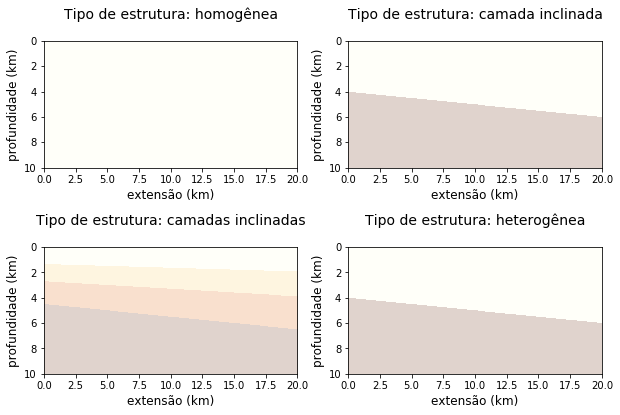

In [4]:
arranjo = '22'
if arranjo == '22':
    figsize = (10,10) 
elif arranjo == '41':
    figsize = (8, 32)

plt.figure(figsize=figsize)

tipo = ['homogênea', 'camada inclinada', 
         'camadas inclinadas', 'heterogênea']

for j in range(len(tipo)):
    plt.subplot(arranjo + str(j+1))
    c = campo_de_velocidades(tipo[j])
    plt.imshow(c, extent=[0, Lx/1000, Lz/1000, 0], 
               vmin=c.min(), vmax=c.max(),
               cmap = plt.cm.YlOrBr, alpha=0.2)
    plt.xlabel('extensão (km)', fontsize=12)
    plt.ylabel('profundidade (km)', fontsize=12)
    plt.title(f'Tipo de estrutura: {tipo[j]}\n', fontsize=14)

plt.subplots_adjust(wspace=0.2, top=0.65)
plt.show()

## Sensores

Consideramos alguns sensores localizados próximos a superfície. Definimos, no momento, as suas coordenadas $(x,z)$.

In [5]:
sensor_i = np.array([3*nx//10 , 4*nx//10, 5*nx//10, 6*nx//10, 7*nx//10])
sensor_j = 5*np.ones_like(sensor_i)
print(f'Temos {len(sensor_i)} sensores, localizados nas seguintes coordenadas:')
for k in range(len(sensor_i)):
    print(f'  Sensor {k+1} localizado em (x,z) = ({sensor_i[k]*dx:.1f}, {sensor_j[k]*dz:.1f}) m')

Temos 5 sensores, localizados nas seguintes coordenadas:
  Sensor 1 localizado em (x,z) = (6000.0, 100.0) m
  Sensor 2 localizado em (x,z) = (8000.0, 100.0) m
  Sensor 3 localizado em (x,z) = (10000.0, 100.0) m
  Sensor 4 localizado em (x,z) = (12000.0, 100.0) m
  Sensor 5 localizado em (x,z) = (14000.0, 100.0) m


### Visualizando a posição dos sensores

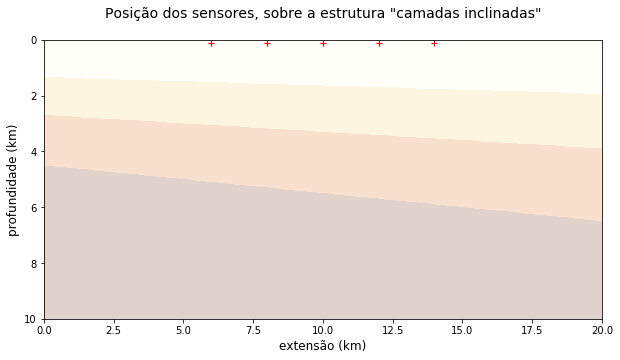

In [6]:
plt.figure(figsize=(10,10))

tipo = 'camadas inclinadas'
c = campo_de_velocidades(tipo)
    
plt.imshow(c, extent=[0, Lx/1000, Lz/1000, 0], 
           vmin=c.min(), vmax=c.max(),
           cmap = plt.cm.YlOrBr, alpha = 0.2)

for i, j in zip(sensor_i, sensor_j):
    plt.plot(i*dx/1000,j*dz/1000, 'r+')

plt.xlabel('extensão (km)', fontsize=12)
plt.ylabel('profundidade (km)', fontsize=12)
plt.title(f'Posição dos sensores, sobre a estrutura "{tipo}"\n', fontsize=14)

plt.show()

## Parâmetros para a evolução temporal

Definimos um tempo final $T_{\rm max}$ para a simulação numérica.

Vamos aproximar as derivadas de segunda ordem, tanto no tempo como no espaço, pelo método padrão de diferenças finitas usando três pontos, que dá uma aproximação de segunda ordem.

Por questões de estabilidade, a condição de CFL (Courant-Friedrichs-Lewy) deve ser satisfeita. Essencialmente, ela requer que o cone de influência da condição inicial em um ponto $(t,x,z)$ da solução pela EDP deve estar contido no cone correspondente da equações em diferenças finitas.

No caso em questão (equação da onda bidimensional, com aproximação de segunda ordem padrão, velocidade máxima $c$ e passos distintos $\rm{d}x$ e $\rm{d}y$ em cada direção), a condição de CFL local tem a forma

$$ \rm{d} t \leq \frac{1}{c}\frac{\rm{d} x\rm{d} y}{\sqrt{\rm{d}x^2 + \rm{d}y^2}}.
$$

## Definição dos parâmetros temporais

Assim, definimos os parâmetros temporais 

In [7]:
Tmax = 3.0 # tempo final (segundos)
dt = dx*dz/np.sqrt(dx**2+dz**2)/np.max(c.max()) # passo temporal (segundos)
nt = int(np.ceil(Tmax/dt))
t_intervalo = np.arange(nt) * dt

print(f'Tempo limite: {Tmax:.1f} s')
print(f'Tempo final da simulação: {t_intervalo[-1]:.1f} s')
print(f'Número de passos temporais: {nt}')
print(f'Passo temporal: {1000*dt:.2f} ms')

Tempo limite: 3.0 s
Tempo final da simulação: 3.0 s
Número de passos temporais: 1007
Passo temporal: 2.98 ms


## Termo de fonte

Consideramos uma fonte de onda acústica em algum ponto no interior do domínio, com uma forma Gaussiana no tempo.

In [8]:
fonte_pico_n = 100 # índice do instante de tempo do pico do sinal da fonte
fonte_foco_i = 2*nx//5 # índice da posição longitudinal do foco
fonte_foco_j = 2*nz//3 # índice da posição vertical do foco
fonte_freq = 10.0 # frequência de onda fonte (Hertz)
fonte_periodo = 1/fonte_freq # período de onda da fonte (segundos)

print(f'Instante do pico da fonte do tremor: {1000*fonte_pico_n*dt:.2f} ms (na iteração número {fonte_pico_n})')
print(f'Posição do foco: ({fonte_foco_i*dx:.1f}, {fonte_foco_j*dz:.1f}) m')
print(f'Frequência princial da fonte de tremor: {fonte_freq} Hz')
print(f'Período principal da fonte de tremor: {1000*fonte_periodo} ms')

Instante do pico da fonte do tremor: 298.14 ms (na iteração número 100)
Posição do foco: (8000.0, 6660.0) m
Frequência princial da fonte de tremor: 10.0 Hz
Período principal da fonte de tremor: 100.0 ms


### Foco da fonte

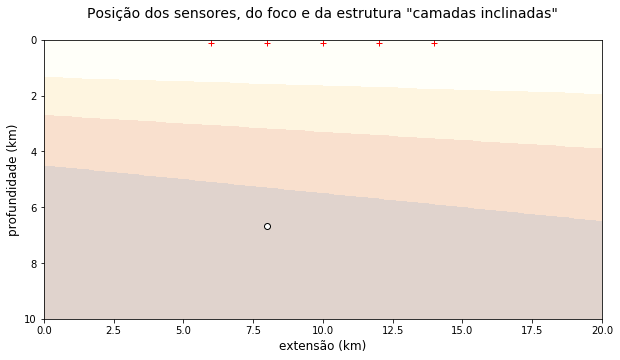

In [9]:
plt.figure(figsize=(10,10))

tipo = 'camadas inclinadas'
c = campo_de_velocidades(tipo)
    
plt.imshow(c, extent=[0, Lx/1000, Lz/1000, 0], 
           vmin=c.min(), vmax=c.max(),
           cmap = plt.cm.YlOrBr, alpha = 0.2)

for i, j in zip(sensor_i, sensor_j):
    plt.plot(i*dx/1000,j*dz/1000, 'r+')

plt.plot(fonte_foco_i*dx/1000, fonte_foco_j*dz/1000, 'ko', markerfacecolor='white')

plt.xlabel('extensão (km)', fontsize=12)
plt.ylabel('profundidade (km)', fontsize=12)
plt.title(f'Posição dos sensores, do foco e da estrutura "{tipo}"\n', fontsize=14)

plt.show()

## Sinal temporal da fonte

In [10]:
fonte = np.zeros(nt + 1)
for n in range(nt):
    fonte[n] = np.exp(-1.0 / fonte_periodo ** 2 * ((n - fonte_pico_n) * dt) ** 2)
# Take the first derivative
fonte = np.diff(fonte) / dt
fonte[nt - 1] = 0
fonte_max = fonte.max()
fonte_min = fonte.min()
print(fonte_min, fonte_max)

-8.575635915084154 8.575635915084154


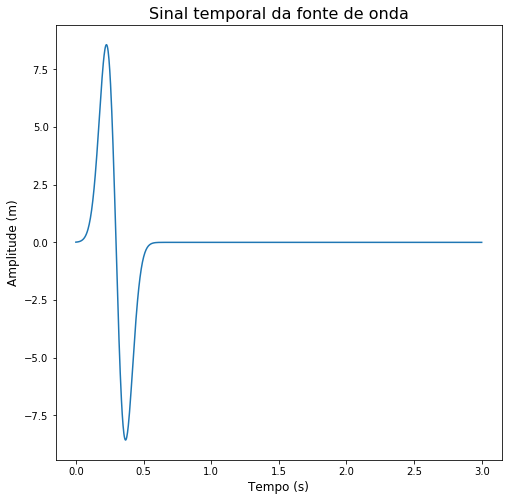

In [11]:
plt.figure(figsize=(8, 8))

plt.plot(t_intervalo, fonte)
plt.title('Sinal temporal da fonte de onda', fontsize=16)
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Amplitude (m)', fontsize=12)

plt.show()

## Evolução temporal

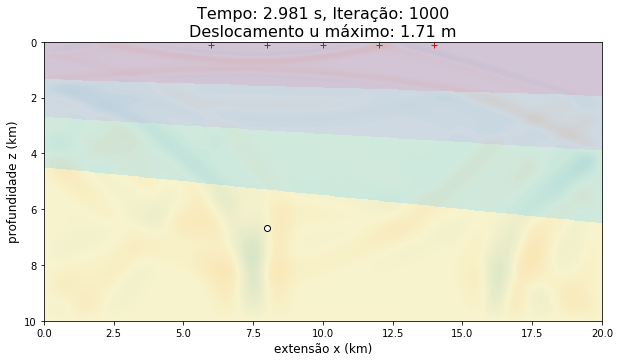

In [12]:
# inicializa sismograma
sismograma = np.zeros((len(sensor_i), nt)) 

# inicializa deslocamento
u = np.zeros((nz, nx))
uprev = np.zeros((nz, nx))
uprox = np.zeros((nz, nx))
uxx = np.zeros((nz, nx))
uzz = np.zeros((nz, nx))

# inicializa figura
fig = plt.figure(figsize=(10,10))

image = plt.imshow(uprox, interpolation='bilinear', vmin=fonte_min, vmax=fonte_max, 
                   extent=[0, Lx, 0, Lz], cmap=plt.cm.RdBu)

#fig.show()

# passos para a atualização do gráfico
dn_show = 10

# índices para o sismograma
ir = np.arange(len(sensor_i))

# Evolução temporal
for n in range(nt):
    uxx[:,1:nx-2] = u[:,2:nx-1] - 2*u[:,1:nx-2] + u[:,:nx-3]
    uzz[1:nz-2,:] = u[:nz-3,:] - 2*u[1:nz-2,:] + u[2:nz-1,:]      
            
    uxx /= dx**2
    uzz /= dz**2

    uprox = 2*u - uprev + dt**2*c**2*(uxx + uzz)
    # Adiciona fonte 
    uprox[fonte_foco_j, fonte_foco_i] = uprox[fonte_foco_j, fonte_foco_i] + fonte[n]

    # Plot every isnap-th iteration
    if n % dn_show == 0:
        
        plt.figure(figsize=(10,10))
        
        # Escreve o título
        umax = u.max()
        title_str = f"Tempo: {n*dt:.3f} s, Iteração: {n}\n"
        if 0.01 <= umax < 999.99:
            title_str += f"Deslocamento u máximo: {umax:.2f} m"
        else:
            title_str += f"Deslocamento u máximo: {umax:.2e} m"
        plt.title(title_str, fontsize=16)

        # Exibe posição da fonte
        plt.plot(fonte_foco_i*dx/1000, fonte_foco_j*dz/1000, 'ko', markerfacecolor='white')



        # Eixos
        plt.xlabel('extensão x (km)', fontsize=12)
        plt.ylabel('profundidade z (km)', fontsize=12)        
        
        # exibe onda
        plt.imshow(uprox, interpolation='bilinear', vmin=fonte_min, vmax=fonte_max, 
                   extent=[0, Lx/1000, Lz/1000, 0], cmap=plt.cm.RdBu)
        
        # barra de cores de nível de deslocamento
#        plt.colorbar()
        
        # traça terreno
        plt.imshow(c, extent=[0, Lx/1000, Lz/1000, 0], alpha=0.2)

        for i, j in zip(sensor_i, sensor_j):
            plt.plot(i*dx/1000,j*dz/1000, 'r+')
            
        clear_output(wait = True)
        plt.pause(0.1)

    uprev, u = u, uprox

    # Save seismograms
    sismograma[:, n] = u[sensor_j, sensor_i]

## Leitura dos sensores

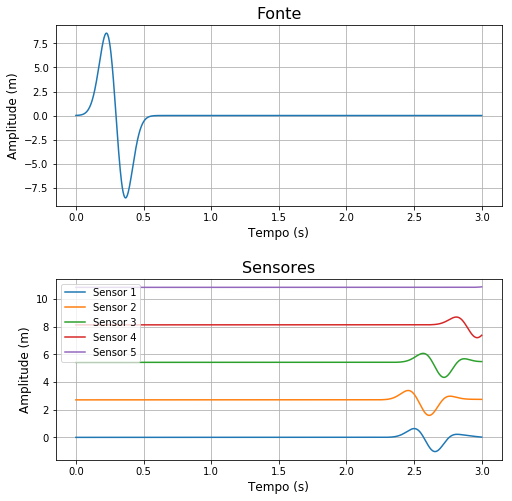

In [13]:
plt.figure(figsize=(8, 8))

plt.subplot(211)
plt.grid()
plt.plot(t_intervalo, fonte)
plt.title('Fonte', fontsize=16)
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Amplitude (m)', fontsize=12)


plt.subplot(212)
ymax = sismograma.ravel().max()
kmax = len(sensor_i)
plt.grid()
for k in range(len(sensor_i)):
    plt.plot(t_intervalo, sismograma[k, :] + 4*ymax*k, label=f'Sensor {k+1}')
    plt.title('Sensores', fontsize=16)
    plt.xlabel('Tempo (s)', fontsize=12)
    plt.ylabel('Amplitude (m)', fontsize=12)
plt.legend(loc='upper left')


plt.subplots_adjust(hspace=0.4)
plt.show()

---

### Apresentação em slides

In [14]:
!jupyter nbconvert 21.00-Aula21.ipynb --to slides --SlidesExporter.reveal_scroll=True --template output_toggle.tpl

[NbConvertApp] Converting notebook 21.00-Aula21.ipynb to slides
[NbConvertApp] Writing 499917 bytes to 21.00-Aula21.slides.html


<!--NAVIGATOR-->

---
[<- Aula 20: Retroprojeção não-filtrada](20.00-Aula20.ipynb) | [Página Inicial](00-Sumario.ipynb) 

<a href="https://colab.research.google.com/github/rmsrosa/modelagem_matematica/blob/master/aulas/21.00-Aula21.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

<a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/master?filepath=aulas/21.00-Aula21.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open and Execute in Binder"></a>

<a href="https://rmsrosa.github.io/modelagem_matematica/aulas/21.00-Aula21.slides.html"><img align="left" src="https://rmsrosa.github.io/jupyterbookmaker/badges/slides_badge.svg" alt="Open slides" title="Open and View Slides"></a>
&nbsp;